In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch04 tensorflow v1 feat.스케일조정</font>

# 1. tensorflow v2.xx에서 v1 사용하기

In [2]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## tensorflow

- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [3]:
# tensor = data(상수, 변수)와 연산

node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [4]:
# 간단한 연산 tensor 그래프

node1 = tf.constant(10, dtype = tf.float16)
node2 = tf.constant(20, dtype = tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [5]:
# 타입 변경

node1 = tf.constant(np.array([1, 2, 3]), dtype = tf.int16)
node2 = tf.cast(node1, dtype = tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [6]:
# 평균값 계산 : tf.reduce_mean()

data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [7]:
# 랜덤값을 갖는 tensor

a = tf.random_normal([2])  # 평균이 0, 표준편차가 1인 난수 실수 2개 (정규분포를 이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([0.07820129, 2.3041306 ], dtype=float32),
 array([-2.7589397], dtype=float32)]

In [8]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # w변수의 난수 초기화
sess.run(w)

array([-0.18657091], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현

## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [9]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 4])

# weight오 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis : 예측값
H = W * x + b

#cost function(손실함수 = mse; 최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))

'''
학습목적 : cost가 최소가 되는 W, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()

# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())

# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:2.99391770362854, W:[1.1697425], b:[-0.8976649]
200번째 cost:0.15031714737415314, W:[1.4492158], b:[-0.02117286]
400번째 cost:0.05739843472838402, W:[1.277588], b:[0.3689772]
600번째 cost:0.021917568519711494, W:[1.1715328], b:[0.6100659]
800번째 cost:0.00836916919797659, W:[1.1059966], b:[0.75904477]
1000번째 cost:0.0031957642640918493, W:[1.0654995], b:[0.85110426]
1200번째 cost:0.0012203068472445011, W:[1.0404751], b:[0.9079913]
1400번째 cost:0.0004659719706978649, W:[1.025011], b:[0.9431443]
1600번째 cost:0.00017793162260204554, W:[1.0154554], b:[0.9648666]
1800번째 cost:6.794383079977706e-05, W:[1.0095505], b:[0.9782895]
2000번째 cost:2.5943581931642257e-05, W:[1.0059016], b:[0.9865845]
2200번째 cost:9.906883860821836e-06, W:[1.0036469], b:[0.9917098]
2400번째 cost:3.7831271129107336e-06, W:[1.0022537], b:[0.994877]
2600번째 cost:1.4450932894760626e-06, W:[1.001393], b:[0.9968339]
2800번째 cost:5.523017421182885e-07, W:[1.000861], b:[0.9980427]
3000번째 cost:2.1121540783042292e-07, W:[1.0005326], b:[0

In [10]:
# 최종적으로 나온 회귀식 : H = W * x + b

sess.run([W, b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [11]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [12]:
def predict(x) :
    return W_[0] * x + b_[0]

In [13]:
input_x = int(input('입력값은? '))
print('예측값은', predict(input_x))

입력값은? 30
예측값은 31.000242173671722


## 2.2 predict를 위한 placeholder이용

- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [14]:
# x = np.array([1, 2, 3])
x = tf.placeholder(tf.float16)
H = 1 * x + 1
sess = tf.Session()
sess.run(H, feed_dict = {x:5})
sess.run(H, feed_dict = {x:np.array([1, 2, 3])})

array([2., 3., 4.], dtype=float16)

In [15]:
# H = 2 * x + 1
x_data = np.array([1, 2, 3, 5, 8])
y_data = np.array([3, 5, 7, 11, 17])

# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis(예측값)
H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 5000번 학습
for step in range(5001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict = {x:x_data,
                                                      y:y_data})
    if step % 200 == 0 :
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:51.249427795410156, W:[1.2702575], b:[0.07040393]
200째 : cost:0.017478499561548233, W:[2.0449603], b:[0.75968856]
400째 : cost:0.0017191311344504356, W:[2.0141003], b:[0.9246334]
600째 : cost:0.00016909235273487866, W:[2.0044222], b:[0.9763636]
800째 : cost:1.663162220211234e-05, W:[2.001387], b:[0.9925871]
1000째 : cost:1.6359990695491433e-06, W:[2.0004349], b:[0.99767506]
1200째 : cost:1.6083369303032669e-07, W:[2.0001366], b:[0.9992707]
1400째 : cost:1.586149700472106e-08, W:[2.000043], b:[0.9997709]
1600째 : cost:1.5636942851671165e-09, W:[2.0000136], b:[0.9999281]
1800째 : cost:1.666762700081037e-10, W:[2.0000045], b:[0.9999762]
2000째 : cost:2.1827872842550278e-11, W:[2.000002], b:[0.9999914]
2200째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2400째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2600째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2800째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3000째 : cost:2.060005464821

In [16]:
# 예측하기

sess.run(H, feed_dict = {x:5})

array([11.000001], dtype=float32)

In [17]:
sess.run(H, feed_dict = {x:np.array([5, 6, 7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현 (scale 조정 X)

In [18]:
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([3, 15, 68, 80, 95])

# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis(예측값)
H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 5000번 학습
for step in range(3001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict = {x:x_data,
                                                      y:y_data})
    if step % 200 == 0 :
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:5207.97705078125, W:[7.6850157], b:[0.14308333]
200째 : cost:83.57730865478516, W:[10.227563], b:[-0.8176562]
400째 : cost:83.49102783203125, W:[10.279957], b:[-1.2055924]
600째 : cost:83.48310089111328, W:[10.295826], b:[-1.3230947]
800째 : cost:83.4823989868164, W:[10.300632], b:[-1.3586848]
1000째 : cost:83.48233032226562, W:[10.302089], b:[-1.3694649]
1200째 : cost:83.48233032226562, W:[10.302529], b:[-1.3727297]
1400째 : cost:83.4823226928711, W:[10.302663], b:[-1.3737199]
1600째 : cost:83.48233032226562, W:[10.302703], b:[-1.3740188]
1800째 : cost:83.48231506347656, W:[10.302715], b:[-1.3741087]
2000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2200째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2400째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2600째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2800째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
3000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]


In [19]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(조정O)

```
normalization(정규화) : 0~1로 조정 
                    X - Xmin 
    normalization = ──────────── 
                    Xmax - Xmin 
* 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
    
standardization(표준화) : 평균0, 표준편차1로 조정 
                        X - Xmean(평균) 
    standardization = ────────────────── 
                        Xstd(표준편차) 
* 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)
```

In [20]:
# 라이브러리를 쓰지 않고 정규화

x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([3, 15, 68, 80, 95])
scaled_x_data = (x_data - x_data.min() ) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min() ) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [21]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)

from sklearn.preprocessing import MinMaxScaler

x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([3, 15, 68, 80, 95]).reshape(-1, 1)
# np.column_stack([x_data, y_data])
scaler_x = MinMaxScaler()  # x_data를 정규화시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler()  # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [22]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis(예측값)
H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 12000번 학습
for step in range(12001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict = {x:scaled_x_data,
                                                      y:scaled_y_data})
    if step % 600 == 0 :
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:0.48494189977645874, W:[0.6449705], b:[-0.43969893]
600째 : cost:0.034227948635816574, W:[0.8779144], b:[-0.02253924]
1200째 : cost:0.011536134406924248, W:[0.9363784], b:[0.06739835]
1800째 : cost:0.010290277190506458, W:[0.95498997], b:[0.08458965]
2400째 : cost:0.01014421321451664, W:[0.9639654], b:[0.0858923]
3000째 : cost:0.0100735854357481, W:[0.97015816], b:[0.08397309]
3600째 : cost:0.010022173635661602, W:[0.9751821], b:[0.08162175]
4200째 : cost:0.00998340267688036, W:[0.9794704], b:[0.07942443]
4800째 : cost:0.009954089298844337, W:[0.9831812], b:[0.07747959]
5400째 : cost:0.009931931272149086, W:[0.9864034], b:[0.07578085]
6000째 : cost:0.009915177710354328, W:[0.9892045], b:[0.07430207]
6600째 : cost:0.009902499616146088, W:[0.99164057], b:[0.07301581]
7200째 : cost:0.009892923757433891, W:[0.993758], b:[0.07189723]
7800째 : cost:0.009885680861771107, W:[0.9955994], b:[0.07092457]
8400째 : cost:0.009880204685032368, W:[0.9972008], b:[0.07007884]
9000째 : cost:0.0098760649561882

In [23]:
# 예측 : 모델에 scale 조정된 값으로 예측 → scale 조정된 y값

scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :', scaled_input, sep = '\n')
scaled_output = sess.run(H, feed_dict = {x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep = '\n')
print('결과 :', scaler_y.inverse_transform(scaled_output), sep = '\n')

모델 예측을 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.17835264]
 [0.28982526]]
결과 :
[[19.408443]
 [29.663923]]


In [24]:
# x_data들의 예측값

scaled_y_hat = sess.run(H, feed_dict = {x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

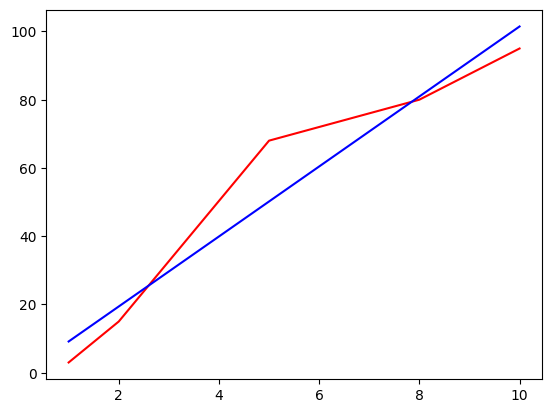

In [25]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')
plt.show()

In [26]:
# 라이브러리를 쓰고 표준화 (StandardScaler 이용)

from sklearn.preprocessing import StandardScaler

x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([3, 15, 68, 80, 95]).reshape(-1, 1)

scaler_x = StandardScaler()  # x_data를 표준화할 객체
scaler_y = StandardScaler()  # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


In [27]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis(예측값)
H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 12000번 학습
for step in range(12001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict = {x:scaled_x_data,
                                                      y:scaled_y_data})
    if step % 600 == 0 :
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:1.794394850730896, W:[-0.33330464], b:[-0.17608291]
600째 : cost:0.21940569579601288, W:[0.5766301], b:[-0.05297148]
1200째 : cost:0.07686900347471237, W:[0.8503675], b:[-0.01593553]
1800째 : cost:0.06396926939487457, W:[0.9327172], b:[-0.00479391]
2400째 : cost:0.06280185282230377, W:[0.957491], b:[-0.00144215]
3000째 : cost:0.06269620358943939, W:[0.9649434], b:[-0.00043384]
3600째 : cost:0.06268664449453354, W:[0.9671852], b:[-0.0001305]
4200째 : cost:0.0626857727766037, W:[0.9678596], b:[-3.9250634e-05]
4800째 : cost:0.06268571317195892, W:[0.96806186], b:[-1.1798915e-05]
5400째 : cost:0.06268569082021713, W:[0.9681216], b:[-3.5408848e-06]
6000째 : cost:0.06268569082021713, W:[0.96813506], b:[-1.0490863e-06]
6600째 : cost:0.06268569827079773, W:[0.96813506], b:[-2.9545285e-07]
7200째 : cost:0.06268568336963654, W:[0.96813506], b:[-6.934279e-08]
7800째 : cost:0.06268569827079773, W:[0.96813506], b:[-9.99159e-09]
8400째 : cost:0.06268569082021713, W:[0.96813506], b:[1.7635202e-08]
9000째 

In [28]:
# x_data들의 예측값

scaled_y_hat = sess.run(H, feed_dict = {x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

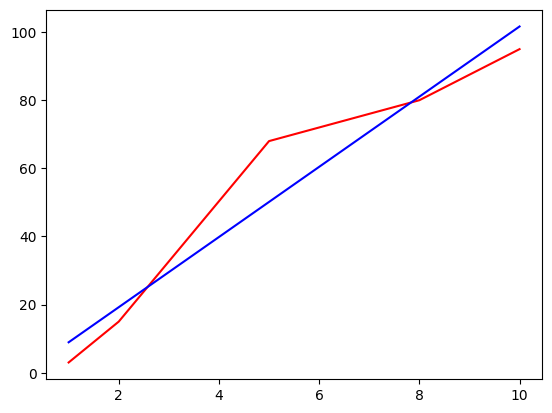

In [29]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')
plt.show()

## 2.5 입력(독립)변수 x가 3개, 타겟(종속)변수 y가 1개 (csv → array)

In [30]:
# 방법 1 : csv → array

import numpy as np

#data = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',', encoding='utf-8')  # 결측치, header가 없어야 함
data = np.genfromtxt('data/ozone.csv',
                    delimiter = ',',
                    skip_header = 1,
                    missing_values = 'NA',
                    filling_values = np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [31]:
# 방법 2 : csv파일 → 데이터프레임 → 결측치 처리 → 넘파이배열 → 머신러닝

# 1. csv를 데이터프레임으로 읽기

import pandas as pd

data = pd.read_csv('data/ozone.csv')
data.info()  # Ozone, Solar.R 열에만 결측치
data.isna().sum()  # 열별 결측치 갯수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [32]:
# 2. 결측치 처리

# 결측치 처리 방법 1 : 결측치가 있는 행을 제거
# data.dropna(how = 'any', axis = 0, inplace = True)

# 결측치 처리 방법 2 : 결측치 대체(열별 평균값으로 대체)
data.mean()  # 열별 평균
# data.fillna(value = data.mean(), inplace = True)

# 결측치 처리 방법 3 : 결측치 대체 (월별 열별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone', 'Solar.R']].mean()
display(mean_data)
print('5월에 Ozone으로 대체할 값 :', mean_data.loc[5, 'Ozone'])

,Ozone,Solar.R
Month,,
5,23.615385,181.296296
6,29.444444,190.166667
7,59.115385,216.483871
8,59.961538,171.857143
9,31.448276,167.433333


5월에 Ozone으로 대체할 값 : 23.615384615384617


In [33]:
# 결측치가 있는 데이터

data[data['Ozone'].isna() | data['Solar.R'].isna()].head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5


In [34]:
def fill_nan(row) :
    #print(row)
    #print(row.isna())
    'row["Ozone"]이나 row["Solar.R"]가 결측치면 mean_data[월, 열이름]으로 대체'
    #if np.isna(row['Ozone']):
    pd.options.mode.copy_on_write = True 
    # row = row.copy()
    if row.isna()['Ozone'] :
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R'] :
        row['Solar.R'] = mean_data.loc[row['Month'], 'Solar.R']
    return row

fill_nan(data.loc[4])

Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [35]:
data = data.apply(fill_nan, axis=1)
X_data = data[['Solar.R', 'Wind', 'Temp']].values  # 독립변수
y_data = data[['Ozone']].values  # 타겟변수
X_data.shape, y_data.shape

((153, 3), (153, 1))

In [36]:
# tensorflow 구현

# 1. X, y
X = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H - y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 6. 학습
for step in range(1, 20001) :
    _, cost_val = sess.run([train, cost], feed_dict = {X:X_data,
                                                       y:y_data})
    if step % 1000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost:671.7380981445312
2000번째 cost:567.58447265625
3000번째 cost:515.3715209960938
4000번째 cost:489.1947021484375
5000번째 cost:476.0687255859375
6000번째 cost:469.4845886230469
7000번째 cost:466.17962646484375
8000번째 cost:464.5184326171875
9000번째 cost:463.6813659667969
10000번째 cost:463.2572021484375
11000번째 cost:463.0400695800781
12000번째 cost:462.9266662597656
13000번째 cost:462.8653869628906
14000번째 cost:462.830078125
15000번째 cost:462.8078918457031
16000번째 cost:462.792236328125
17000번째 cost:462.7799072265625
18000번째 cost:462.7691955566406
19000번째 cost:462.7593078613281
20000번째 cost:462.74993896484375
최종 cost:462.74993896484375, W:[[ 0.05540153]
 [-3.5974615 ]
 [ 0.8532775 ]], b:[0.41561678]


In [38]:
np.column_stack([X_data, y_data])[:3]

array([[190. ,   7.4,  67. ,  41. ],
       [118. ,   8. ,  72. ,  36. ],
       [149. ,  12.6,  74. ,  12. ]])

In [39]:
# 예측하기

input_data = np.array([[118. , 8. ,72.]])
sess.run(H, feed_dict = {X:input_data})

array([[39.609287]], dtype=float32)

### 스케일 조정
```
    MinMaxScaler, StandardScaler
       0 ~ 1        -2 ~ 2 (주로 0 근처)
```

In [40]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_X_data = x_scaler.fit_transform(X_data)
scaled_y_data = y_scaler.fit_transform(y_data)
scaled_X_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [41]:
np.column_stack([scaled_X_data, scaled_y_data])[:2]

array([[0.55963303, 0.3       , 0.26829268, 0.23952096],
       [0.33944954, 0.33157895, 0.3902439 , 0.20958084]])

In [42]:
# tensorflow 구현

# 1. X, y
X = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H - y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 6. 학습
for step in range(1, 30001) :
    _, cost_val = sess.run([train, cost], feed_dict = {X:scaled_X_data,
                                                       y:scaled_y_data})
    if step % 1000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost:13.838584899902344
2000번째 cost:12.884317398071289
3000번째 cost:11.996190071105957
4000번째 cost:11.169634819030762
5000번째 cost:10.40039348602295
6000번째 cost:9.684471130371094
7000번째 cost:9.018172264099121
8000번째 cost:8.398053169250488
9000번째 cost:7.820930004119873
10000번째 cost:7.2838053703308105
11000번째 cost:6.783914566040039
12000번째 cost:6.318668365478516
13000번째 cost:5.885682582855225
14000번째 cost:5.482698917388916
15000번째 cost:5.1076507568359375
16000번째 cost:4.758589267730713
17000번째 cost:4.433730125427246
18000번째 cost:4.131380081176758
19000번째 cost:3.849984645843506
20000번째 cost:3.5880916118621826
21000번째 cost:3.3443443775177
22000번째 cost:3.1174957752227783
23000번째 cost:2.9063594341278076
24000번째 cost:2.70986270904541
25000번째 cost:2.5269765853881836
26000번째 cost:2.3567657470703125
27000번째 cost:2.1983442306518555
28000번째 cost:2.0508954524993896
29000번째 cost:1.9136661291122437
30000번째 cost:1.7859426736831665
최종 cost:1.7859426736831665, W:[[ 1.2104748 ]
 [-0.9807955 ]
 [ 0.36

In [43]:
# 예측하기

input_data = np.array([[190. ,7.4, 67.]])
scaled_y_hat = sess.run(H, feed_dict={X:x_scaler.transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

array([[264.9357]], dtype=float32)

# 3. 이진분류 = logistic Regression (분류분석)

- logistic 회귀분석 : 기본의 회귀분석과 다른 처리 필요

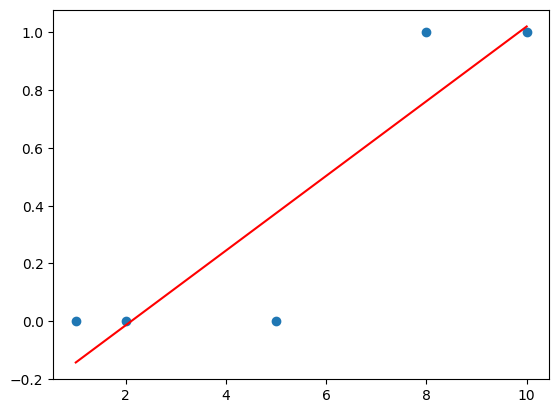

In [44]:
from scipy import stats
import matplotlib.pyplot as plt

x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1])  # 실제값
lm = stats.linregress(x, y)  # 기울기(W)와 y절편(b)
H = lm[0] * x + lm[1]
plt.plot(x, H, 'r')
plt.scatter(x, y)

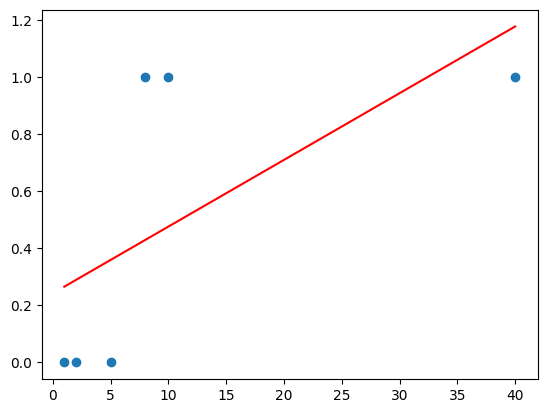

In [45]:
x = np.array([1, 2, 5, 8, 10, 40])
y = np.array([0, 0, 0, 1, 1, 1])  # 실제값
lm = stats.linregress(x, y)  # 기울기(W)와 y절편(b)
H = lm[0] * x + lm[1]
plt.plot(x, H, 'r')
plt.scatter(x, y)

In [46]:
# 교안 50pt

import numpy as np

X_data = np.array([[10, 0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1], [1], [1], [1], [0], [0], [0],])

# tensorflow 구현(tensor 그래프)
X = tf.placeholder(shape=[None, 2], dtype = tf.float32)
y = tf.placeholder(shape=[None, 1], dtype = tf.float32)

# 독립변수가 2개, 종속변수가 1개의 weight, bias
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                             labels = y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# sess객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 8001) :
    _, cost_val = sess.run([train, cost], feed_dict = {X:X_data,
                                                       y:y_data})
    if step % 800 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

800번째 cost:0.20616865158081055
1600번째 cost:0.1635892391204834
2400번째 cost:0.13835717737674713
3200번째 cost:0.12007175385951996
4000번째 cost:0.10590565949678421
4800번째 cost:0.09456232935190201
5600번째 cost:0.085281603038311
6400번째 cost:0.07756274193525314
7200번째 cost:0.07105503976345062
8000번째 cost:0.06550396233797073


In [47]:
# 모델 사용

input_data = np.array([[5, 2]])
predict = tf.cast(H >= 0.5, dtype = tf.float32)
sess.run(predict, feed_dict = {X:input_data})

array([[1.]], dtype=float32)

In [48]:
# accuracy

correct = tf.equal(predict, y)
sess.run(correct, feed_dict = {X:X_data,
                               y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict = {X:X_data,
                                                     y:y_data}))

모델 정확도 : 1.0


# 4. XOR

In [49]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])

# X, y
X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 독립변수가 2개, 종속변수가 1개 W, b
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))

# H
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                              labels = y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(8001) :
    _, cost_val = sess.run([train, cost], feed_dict = {X:X_data,
                                                       y:y_data})
    if step % 1000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:0.8828741312026978
1000번째 cost:0.7060294151306152
2000번째 cost:0.6976680755615234
3000번째 cost:0.6948224306106567
4000번째 cost:0.6937994360923767
5000번째 cost:0.6934125423431396
6000번째 cost:0.6932590007781982
7000번째 cost:0.6931955218315125
8000번째 cost:0.6931684613227844


In [50]:
# accuracy

predict = tf.cast(H >= 0.5, dtype = tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict = {X:X_data,
                               y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype = tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict = {X:X_data,
                                                     y:y_data}))

모델 정확도 : 0.5


# 5. Deep Learning XOR 예제

In [51]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])

# X, y
X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# layer1 : (입력 2, 출력 4)
W1 = tf.Variable(tf.random.normal([2, 4]))
b1 = tf.Variable(tf.random.normal([4]))

# H
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2 : (입력 4, 출력 1)
W2 = tf.Variable(tf.random.normal([4, 1]))
b2 = tf.Variable(tf.random.normal([1]))

# H
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                             labels = y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(10001) :
    _, cost_val = sess.run([train, cost], feed_dict = {X:X_data,
                                                       y:y_data})
    if step % 1000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:1.0391710996627808
1000번째 cost:0.5380903482437134
2000번째 cost:0.39390307664871216
3000번째 cost:0.26144635677337646
4000번째 cost:0.1680639386177063
5000번째 cost:0.11158210039138794
6000번째 cost:0.07828463613986969
7000번째 cost:0.057943496853113174
8000번째 cost:0.04482625424861908
9000번째 cost:0.03587302193045616
10000번째 cost:0.0286430511623621


In [52]:
# accuracy

predict = tf.cast(H >= 0.5, dtype = tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict = {X:X_data,
                               y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict = {X:X_data,
                                                     y:y_data}))

모델 정확도 : 1.0


## layer 층 x_data 2개 → 4 → 1을
## layer층 x_data 2개 → 10 → 20 → 10 → 1
                     입력층   hidden layer(relu)  출력층(sigmoid)

In [53]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])

# X, y
X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# layer1 (입력층 relu) : 입력 2, 출력 10
W1 = tf.Variable(tf.random.normal([2, 10]))
b1 = tf.Variable(tf.random.normal([10]))

# H
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2 (은닉층 relu) : 입력 10, 출력 20
W2 = tf.Variable(tf.random.normal([10, 20]))
b2 = tf.Variable(tf.random.normal([20]))

# H
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3 (은닉층 relu) : 입력 20, 출력 10
W3 = tf.Variable(tf.random.normal([20, 10]))
b3 = tf.Variable(tf.random.normal([10]))

# H
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# layer4 (출력층 이진분류에서는 sigmoid, 일반분류에서는 softmax) : 입력 10, 출력 1
W4 = tf.Variable(tf.random.normal([10, 1]))
b4 = tf.Variable(tf.random.normal([1]))

# H
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                             labels = y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(301) :
    _, cost_val = sess.run([train, cost], feed_dict = {X:X_data,
                                                       y:y_data})
    if step % 100 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:4.732914924621582
100번째 cost:0.16747578978538513
200번째 cost:0.13851507008075714
300번째 cost:0.12393417209386826


In [54]:
# accuracy

predict = tf.cast(H >= 0.5, dtype = tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict = {X:X_data,
                               y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict = {X:X_data,
                                                     y:y_data}))

모델 정확도 : 1.0
